In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()
from pandas.plotting import scatter_matrix

# Import dataset

In [4]:
data = pd.read_csv("loan_final313.csv")

In [5]:
display(data.head())

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


In [6]:
data.shape

(887379, 30)

In [7]:
data00 = data.iloc[:,[8, 4, 21, 10, 12, 20, 6, 16, 18, 14, 23]]
display(data00.head())

,annual_inc,emp_length_int,interest_rate,loan_amount,term_cat,loan_condition_cat,home_ownership_cat,purpose_cat,interest_payment_cat,application_type_cat,grade_cat
0,24000,10.0,10.65,5000,1,0,1,1,1,1,2
1,30000,0.5,15.27,2500,2,1,1,2,2,1,3
2,12252,10.0,15.96,2400,1,0,1,3,2,1,3
3,49200,10.0,13.49,10000,1,0,1,4,2,1,3
4,80000,1.0,12.69,3000,2,0,1,4,1,1,2


# Correlation of 9 main features

In [5]:
data0 = data.iloc[:,[8, 4, 21, 10, 12, 20, 6, 16, 18, 14]]
display(data0.head())

,annual_inc,emp_length_int,interest_rate,loan_amount,term_cat,loan_condition_cat,home_ownership_cat,purpose_cat,interest_payment_cat,application_type_cat
0,24000,10.0,10.65,5000,1,0,1,1,1,1
1,30000,0.5,15.27,2500,2,1,1,2,2,1
2,12252,10.0,15.96,2400,1,0,1,3,2,1
3,49200,10.0,13.49,10000,1,0,1,4,2,1
4,80000,1.0,12.69,3000,2,0,1,4,1,1


In [13]:
data0.shape

(887379, 10)

data cleansing： drop application type with "Joint"

In [14]:
data0 = data0[data0.application_type_cat != 2]

In [15]:
data0.shape

(886868, 10)

Since the last column are all "1", we can also drop that column.

In [16]:
data0 = data0.drop(columns=['application_type_cat'])

In [17]:
data0.shape

(886868, 9)

According to task 1, we can drop 3 owenership types with few instances

In [21]:
data0 = data0[data0.emp_length_int != 6.05]

In [22]:
data0.shape

(841873, 9)

In [23]:
data0 = data0[data0.home_ownership_cat < 4]

In [24]:
data0.shape

(841873, 9)

In [25]:
cor_mat0 = np.corrcoef(data0.T)
display(cor_mat0)


array([[ 1.        ,  0.06410727, -0.07257073,  0.32507075,  0.05164125,
        -0.0337475 ,  0.15431071,  0.00395338, -0.06277231],
       [ 0.06410727,  1.        ,  0.00915311,  0.10637775,  0.0688595 ,
        -0.01622169,  0.20946175,  0.01975877,  0.00789167],
       [-0.07257073,  0.00915311,  1.        ,  0.1493673 ,  0.43301815,
         0.1772221 , -0.06344449,  0.15780981,  0.80226025],
       [ 0.32507075,  0.10637775,  0.1493673 ,  1.        ,  0.40821348,
         0.00554873,  0.19560505, -0.03694449,  0.11652007],
       [ 0.05164125,  0.0688595 ,  0.43301815,  0.40821348,  1.        ,
         0.0415768 ,  0.11030898,  0.02935359,  0.3562795 ],
       [-0.0337475 , -0.01622169,  0.1772221 ,  0.00554873,  0.0415768 ,
         1.        , -0.03705226,  0.03162118,  0.14202602],
       [ 0.15431071,  0.20946175, -0.06344449,  0.19560505,  0.11030898,
        -0.03705226,  1.        ,  0.02325849, -0.04970637],
       [ 0.00395338,  0.01975877,  0.15780981, -0.03694449,  0

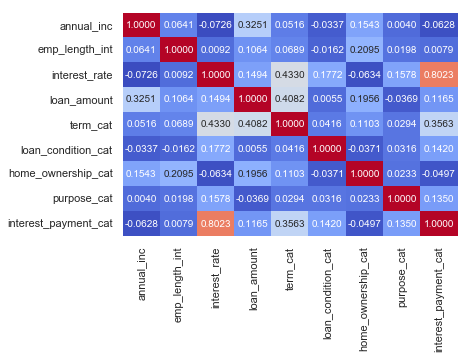

In [26]:
fig0, ax0 = plt.subplots()
sns.heatmap(data0.corr(method='pearson'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax0)
ax0.set_yticklabels(ax0.get_yticklabels(), rotation="horizontal")
plt.savefig('cor_heat.png', bbox_inches='tight', pad_inches=0.0)

C:\Users\liuzh\Anaconda3\envs\py37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


547.4302756 seconds


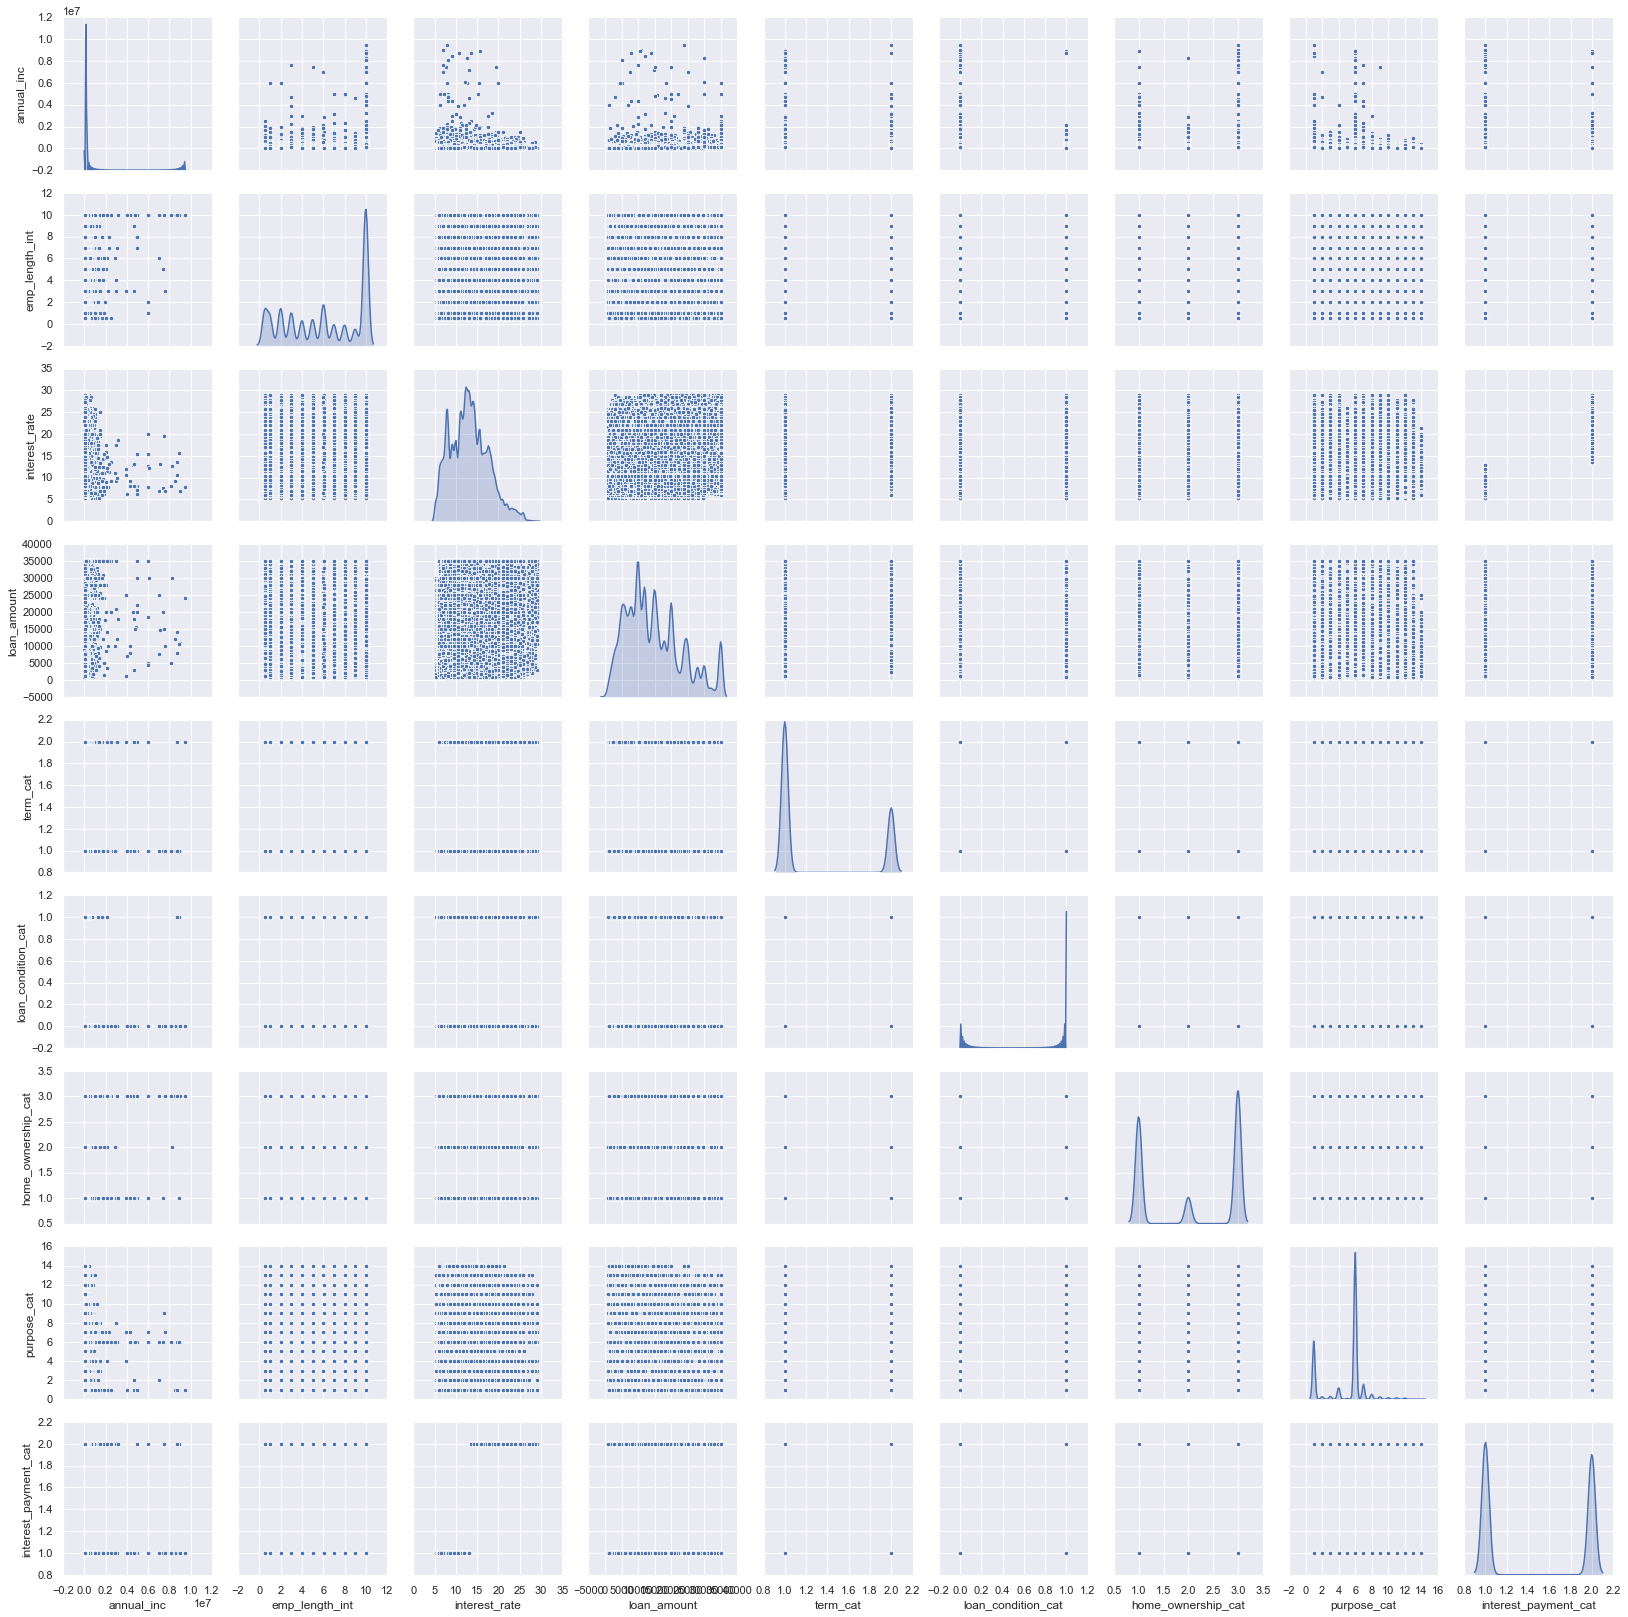

In [66]:
import time
start_time = time.perf_counter()
g1 = sns.pairplot(data0, diag_kind='kde')
end_time = time.perf_counter()
print (end_time - start_time, "seconds")
g1.savefig('nine_fea_cor.png')

In [15]:
display(data0.head())

,annual_inc,emp_length_int,interest_rate,loan_amount,term_cat,loan_condition_cat,home_ownership_cat,purpose_cat,interest_payment_cat
0,24000,10.0,10.65,5000,1,0,1,1,1
1,30000,0.5,15.27,2500,2,1,1,2,2
2,12252,10.0,15.96,2400,1,0,1,3,2
3,49200,10.0,13.49,10000,1,0,1,4,2
4,80000,1.0,12.69,3000,2,0,1,4,1


# Correlation 2 - Numeric features and loan condition (good / bad)

2.1 Outline

In [15]:
data2 = data0.iloc[:,0:6]
display(data2.head())

,annual_inc,emp_length_int,interest_rate,loan_amount,term_cat,loan_condition_cat
0,24000,10.0,10.65,5000,1,0
1,30000,0.5,15.27,2500,2,1
2,12252,10.0,15.96,2400,1,0
3,49200,10.0,13.49,10000,1,0
4,80000,1.0,12.69,3000,2,0


2.4 Group by

In [52]:
data22 = data2.groupby('loan_condition_cat')['annual_inc'].describe()
data22 = data22.rename(index={0: "Good Loan", 1: "Bad Loan"})
display(data22)

,count,mean,std,min,25%,50%,75%,max
loan_condition_cat,,,,,,,,
Good Loan,819255.0,75672.925048,64663.456426,1896.0,46000.0,65000.0,90000.0,9500000.0
Bad Loan,67378.0,67335.778014,64831.528628,2000.0,42000.0,58000.0,80000.0,8900060.0


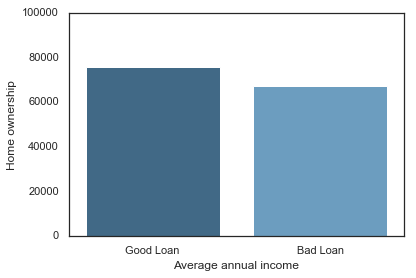

In [53]:
data22 = data22.rename(index={0: "Good Loan", 1: "Bad Loan"})
with sns.axes_style('white'):
    g2 = sns.barplot(x=data22.index, y="mean", data=data22, palette="Blues_d")
    g2.set(ylim=(0, 100000),xlabel="Average annual income", ylabel="Home ownership")
    g2.figure.savefig('inc_cond_rel.png')

* The average annual income of clients who belonged to "Good Loan" category is higher than those belonged to "Bad Loan" by nearly 10,000, which accords with common sense.

In [59]:
data33 = data2.groupby('loan_condition_cat')['interest_rate'].describe()
display(data33)

,count,mean,std,min,25%,50%,75%,max
loan_condition_cat,,,,,,,,
0,819255.0,13.024858,4.313779,5.32,9.76,12.69,15.61,28.99
1,67378.0,15.928478,4.313723,5.32,12.99,15.61,18.75,28.99


* The interest rate of "Good Loan" category is averaging about 3% larger than that of "Bad Loan". This is reasonable because the higher the interest rate, the more likely the clients fail to pay the loan.

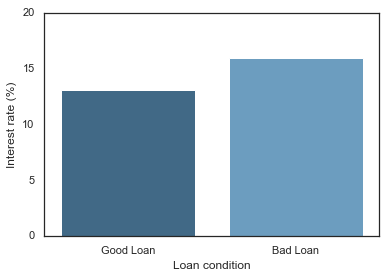

In [61]:
data33 = data33.rename(index={0: "Good Loan", 1: "Bad Loan"})
with sns.axes_style('white'):
    g3 = sns.barplot(x=data33.index, y="mean", data=data33, palette="Blues_d")
    g3.set(ylim=(0, 20),xlabel="Loan condition", ylabel="Interest rate (%)")
    g3.figure.savefig('inte_cond_rel.png')

Object `plot.set` not found.


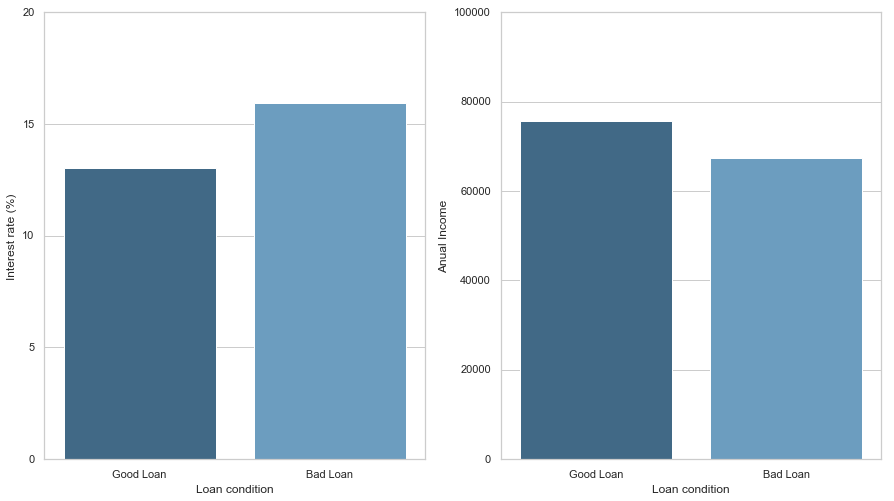

In [96]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
sns.set(style="whitegrid", font_scale=1)
g3 = sns.barplot(x=data33.index, y="mean", data=data33, palette="Blues_d", ax=ax1)
g3.set(ylim=(0, 20),xlabel="Loan condition", ylabel="Interest rate (%)")
g2 = sns.barplot(x=data22.index, y="mean", data=data22, palette="Blues_d", ax =ax2)
g2.set(ylim=(0, 100000),xlabel="Loan condition", ylabel="Anual Income")
plt.savefig('cond_2_cor.png')

In [18]:
data2.groupby('loan_condition_cat')['emp_length_int'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_condition_cat,,,,,,,,
0,819255.0,6.066695,3.510008,0.5,3.0,6.05,10.0,10.0
1,67378.0,5.857934,3.468708,0.5,3.0,6.00,10.0,10.0


In [19]:
data2.groupby('loan_condition_cat')['loan_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_condition_cat,,,,,,,,
0,819255.0,14744.680228,8431.389894,500.0,8000.0,13000.0,20000.0,35000.0
1,67378.0,14860.122369,8471.809481,500.0,8325.0,13175.0,20000.0,35000.0


# Correlation 3 -  Numeric variables and home ownership

3.1 Outline

In [20]:
data3 = data0.iloc[:,[0, 1, 2, 3, 5, 6]]
display(data3.head())

,annual_inc,emp_length_int,interest_rate,loan_amount,loan_condition_cat,home_ownership_cat
0,24000,10.0,10.65,5000,0,1
1,30000,0.5,15.27,2500,1,1
2,12252,10.0,15.96,2400,0,1
3,49200,10.0,13.49,10000,0,1
4,80000,1.0,12.69,3000,0,1


3.3 Group by

In [21]:
display(data3.head())

,annual_inc,emp_length_int,interest_rate,loan_amount,loan_condition_cat,home_ownership_cat
0,24000,10.0,10.65,5000,0,1
1,30000,0.5,15.27,2500,1,1
2,12252,10.0,15.96,2400,0,1
3,49200,10.0,13.49,10000,0,1
4,80000,1.0,12.69,3000,0,1


In [22]:
data3.groupby('home_ownership_cat')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
home_ownership_cat,,,,,,,,
1,355995.0,63988.792107,51158.571867,1896.0,40000.0,55000.0,76000.0,8900060.0
2,87435.0,68920.004815,62494.067061,4000.0,40000.0,56000.0,82000.0,8253000.0
3,443203.0,85122.757730,72788.054401,3800.0,54000.0,73000.0,100000.0,9500000.0


* It is generally believed that clients who own a house have higher income than those who bought a house with a mortgage. However, in this case, an interesting finding is that the average income of clients who bought a house with a mortgage have higher annual income than those who own a house, by a relevantly large margin.

In [23]:
table1 = data3.groupby('home_ownership_cat')['annual_inc'].mean().reset_index()
display(table1)

,home_ownership_cat,annual_inc
0,1,63988.792107
1,2,68920.004815
2,3,85122.757730


In [24]:
table2 = table1.rename(index={0: "Rent", 1: "Own", 2: "Mortgage"})
display(table2)

,home_ownership_cat,annual_inc
Rent,1,63988.792107
Own,2,68920.004815
Mortgage,3,85122.757730


In [25]:
table3 = table2.rename(columns={"annual_inc": "Average annual income"})
display(table3)
table3.iloc[:,0]

,home_ownership_cat,Average annual income
Rent,1,63988.792107
Own,2,68920.004815
Mortgage,3,85122.757730


Rent        1
Own         2
Mortgage    3
Name: home_ownership_cat, dtype: int64

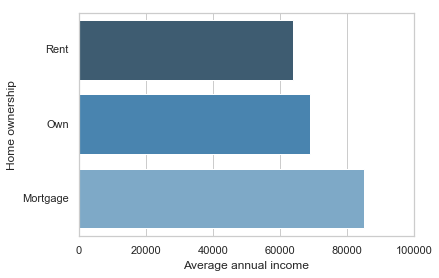

In [91]:
with sns.axes_style('whitegrid'):
    g2 = sns.barplot(x="Average annual income", y=table3.index, data=table3, palette="Blues_d")
    g2.set(xlim=(0, 100000),xlabel="Average annual income", ylabel="Home ownership")
    g2.figure.savefig('inc_hom_rel.png')


In [27]:
data3.groupby('home_ownership_cat')['interest_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
home_ownership_cat,,,,,,,,
1,355995.0,13.575296,4.292134,5.32,10.64,13.33,16.49,28.99
2,87435.0,13.265701,4.430533,5.32,9.99,12.99,16.29,28.99
3,443203.0,12.976639,4.425095,5.32,9.25,12.69,15.61,28.99


* Among all home_ownership category, the interest rate of "Mortgage" is the lowest. One of the possible reason is that some of the clients apply mortgage from this bank, and generally the interest rate of house mortgage is relevantly low because of the long term.

In [28]:
data3.groupby('home_ownership_cat')['loan_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
home_ownership_cat,,,,,,,,
1,355995.0,12869.430750,7627.774073,500.0,7000.0,11200.0,17000.0,35000.0
2,87435.0,14221.752731,8337.604353,700.0,8000.0,12000.0,20000.0,35000.0
3,443203.0,16371.654468,8737.565594,500.0,10000.0,15000.0,22000.0,35000.0


* Except the outliner category "ANY" with only 3 instances, the loan amount of "Mortgage" and "Own" are the higher than others. It makes sense since these clients have house property as collateral, which ease the bank's concern.

In [29]:
data3.groupby('home_ownership_cat')['emp_length_int'].describe()

,count,mean,std,min,25%,50%,75%,max
home_ownership_cat,,,,,,,,
1,355995.0,5.179287,3.484572,0.5,2.0,5.00,9.0,10.0
2,87435.0,6.273288,3.407814,0.5,3.0,6.05,10.0,10.0
3,443203.0,6.706997,3.393290,0.5,4.0,7.00,10.0,10.0


# Correlation 4 - Numeric variables and loan term

4.1 Outline

In [30]:
data4 = data0.iloc[:,[0, 1, 2, 3, 4]]
display(data4.head())

,annual_inc,emp_length_int,interest_rate,loan_amount,term_cat
0,24000,10.0,10.65,5000,1
1,30000,0.5,15.27,2500,2
2,12252,10.0,15.96,2400,1
3,49200,10.0,13.49,10000,1
4,80000,1.0,12.69,3000,2


4.4 Group By

In [31]:
data4.groupby('term_cat')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
term_cat,,,,,,,,
1,620666.0,72565.055611,66307.202295,1896.0,43000.0,60000.0,87000.0,9000000.0
2,265967.0,80813.444732,60441.136639,4800.0,52000.0,70000.0,95000.0,9500000.0


In [32]:
data4.groupby('term_cat')['interest_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
term_cat,,,,,,,,
1,620666.0,12.017853,3.853257,5.32,8.90,11.99,14.47,28.99
2,265967.0,16.110408,4.199324,5.79,13.18,15.61,18.79,28.99


* In this case, the average interest rate of long term loan is larger than that of short term loan, which accord with common sense.

In [33]:
data4.groupby('term_cat')['loan_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
term_cat,,,,,,,,
1,620666.0,12480.944622,7780.613778,500.0,6625.0,10000.0,16000.0,35000.0
2,265967.0,20056.624882,7463.906145,1000.0,14400.0,19425.0,25000.0,35000.0


* An intereting finding is that the percentage of loan term and relevant loan amount is very close in this case

In [34]:
data.groupby('term_cat')['emp_length_int'].describe()

,count,mean,std,min,25%,50%,75%,max
term_cat,,,,,,,,
1,621125.0,5.895494,3.496052,0.5,3.0,6.05,10.0,10.0
2,266254.0,6.412317,3.507199,0.5,3.0,7.00,10.0,10.0


# Correlation 5 - Numeric variables and interest payment

5.1 Outline

In [35]:
data5 = data0.iloc[:,[0, 1, 2, 3, 8]]
display(data5.head())

,annual_inc,emp_length_int,interest_rate,loan_amount,interest_payment_cat
0,24000,10.0,10.65,5000,1
1,30000,0.5,15.27,2500,2
2,12252,10.0,15.96,2400,2
3,49200,10.0,13.49,10000,2
4,80000,1.0,12.69,3000,1


5.4 Group by

In [36]:
data5.groupby('interest_payment_cat')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
interest_payment_cat,,,,,,,,
1,465007.0,78926.647653,72456.187561,2000.0,48000.0,67000.0,95000.0,9500000.0
2,421626.0,70752.108779,54603.842859,1896.0,44000.0,60000.0,85000.0,8900060.0


In [37]:
data5.groupby('interest_payment_cat')['interest_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
interest_payment_cat,,,,,,,,
1,465007.0,9.898140,2.235274,5.32,7.90,9.99,11.99,13.23
2,421626.0,16.937297,2.979805,13.24,14.49,16.29,18.54,28.99


In [38]:
data5.groupby('interest_payment_cat')['emp_length_int'].describe()

,count,mean,std,min,25%,50%,75%,max
interest_payment_cat,,,,,,,,
1,465007.0,6.025151,3.520002,0.5,3.0,6.05,10.0,10.0
2,421626.0,6.079153,3.493067,0.5,3.0,6.05,10.0,10.0


In [39]:
data5.groupby('interest_payment_cat')['loan_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
interest_payment_cat,,,,,,,,
1,465007.0,13848.535398,7832.087930,500.0,8000.0,12000.0,19200.0,35000.0
2,421626.0,15751.477435,8947.059452,600.0,9000.0,14400.0,21000.0,35000.0


# Correlation 6 - Numeric variables and purpose

6.1 Outline

In [97]:
data6 = data0.iloc[:,[0, 1, 2, 3, 7]]
display(data6.head())

,annual_inc,emp_length_int,interest_rate,loan_amount,purpose_cat
0,24000,10.0,10.65,5000,1
1,30000,0.5,15.27,2500,2
2,12252,10.0,15.96,2400,3
3,49200,10.0,13.49,10000,4
4,80000,1.0,12.69,3000,4


6.3 Group by

In [99]:
data66 = data6.groupby('purpose_cat')['annual_inc'].describe()
display(data66)

,count,mean,std,min,25%,50%,75%,max
purpose_cat,,,,,,,,
1,205996.0,75111.453402,64196.383435,4000.0,45000.0,65000.0,90000.0,9500000.0
2,8859.0,67888.729766,100985.396871,3000.0,40000.0,56000.0,80000.0,7000000.0
3,10361.0,89876.542515,73151.524322,6695.0,50000.0,72500.0,105000.0,1500000.0
4,42839.0,69793.425990,58835.689526,2000.0,40000.0,58000.0,82500.0,3964280.0
5,2346.0,69469.114237,47152.931253,7200.0,43000.0,60000.0,81629.0,900000.0
6,523803.0,73902.536196,61111.853613,1896.0,45600.0,64000.0,90000.0,9000000.0
7,51788.0,90294.215687,88881.276644,7000.0,52000.0,75000.0,105000.0,7600000.0
8,17267.0,76701.487346,61982.558129,5000.0,45000.0,64800.0,92500.0,3000000.0
9,8533.0,72150.625337,94233.727065,7500.0,42240.0,60000.0,85000.0,7500000.0


* Among all purposes, clients with loan purpose "home improvement" and "small business" have higher income than others. This makes senses, because people who own a small business or require home development is more likely to be wealthy.
* On the contrary, customers who applied for a loan due to education have the lowest average income, which is also reasonable since educational cost are basic expenditure for a family.

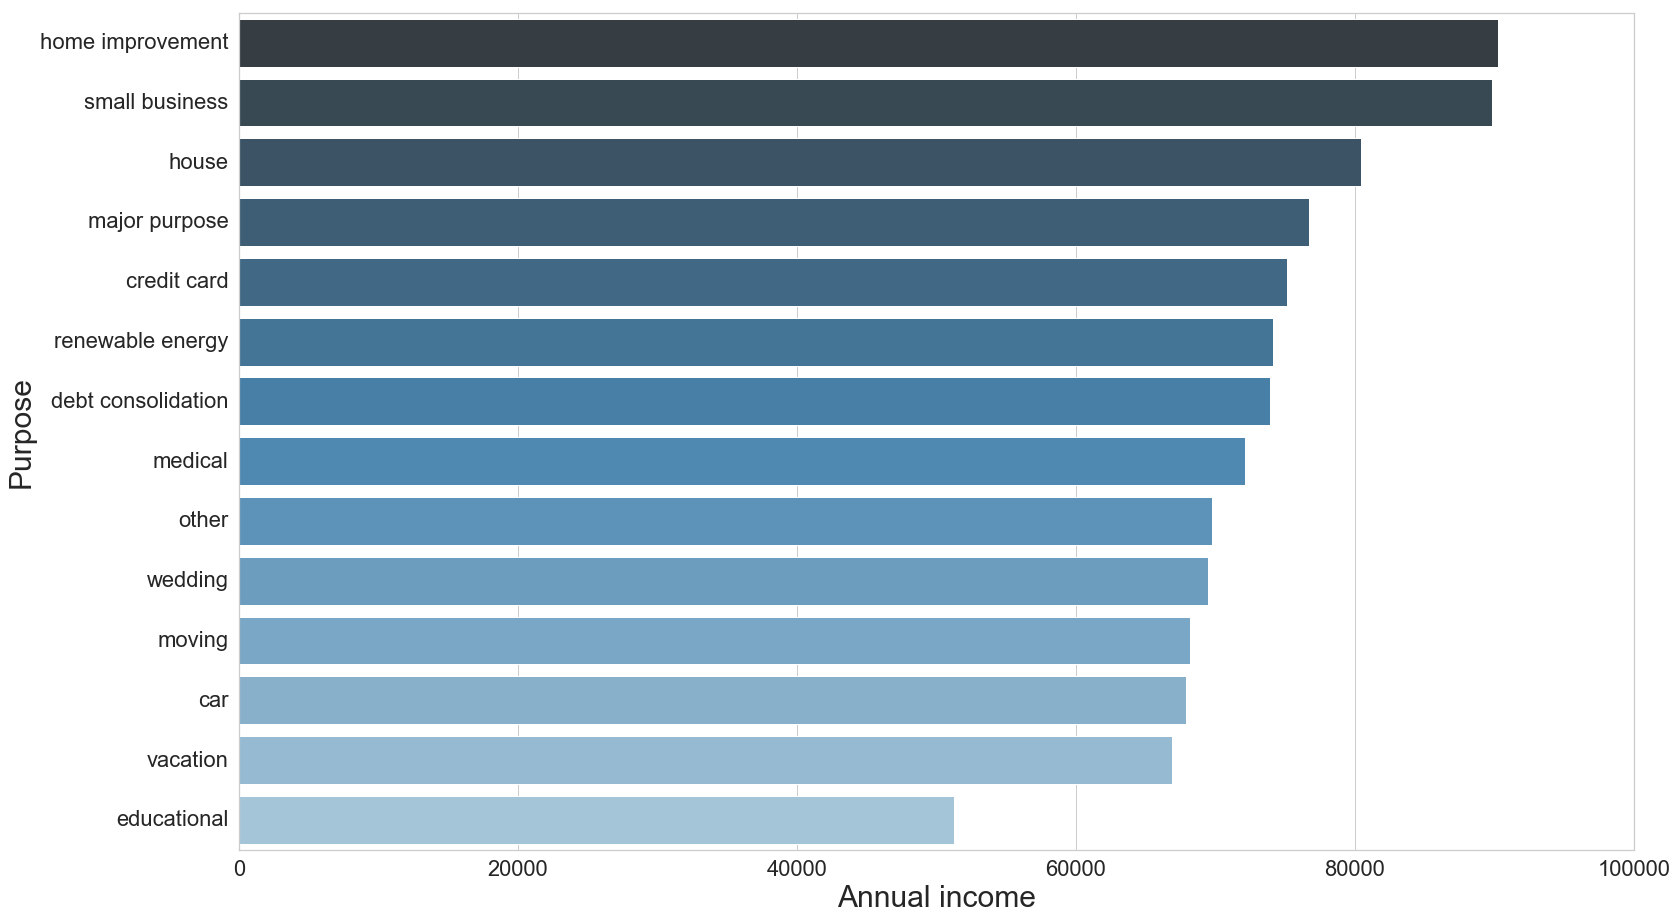

In [144]:

data66 = data66.rename(index={1: "credit card", 2: "car", 3: "small business", 4: "other", 5: "wedding", 
                              6: "debt consolidation", 7: "home improvement", 8: "major purpose", 9: "medical", 
                              10: "moving", 11: "vacation", 12: "house", 13:"renewable energy", 14:"educational"})
sns.set(style="whitegrid", font_scale=2)
plt.figure(figsize=(25,15))
g66 = sns.barplot(x="mean", y=data66.index, data=data66, palette="Blues_d",order=data66.sort_values('mean',ascending = False).index)
g66.set(xlim=(0, 100000))
g66.set_ylabel("Purpose",fontsize=30)
g66.set_xlabel("Annual income",fontsize=30)
g66.figure.savefig('inc_pur_rel.png')

In [42]:
data6.groupby('purpose_cat')['emp_length_int'].describe()

,count,mean,std,min,25%,50%,75%,max
purpose_cat,,,,,,,,
1,205996.0,5.919980,3.524259,0.5,3.0,6.05,10.0,10.0
2,8859.0,5.383949,3.502356,0.5,2.0,5.00,10.0,10.0
3,10361.0,5.508629,3.471294,0.5,2.0,5.00,10.0,10.0
4,42839.0,5.939533,3.505388,0.5,3.0,6.05,10.0,10.0
5,2346.0,4.487681,3.204027,0.5,2.0,4.00,7.0,10.0
6,523803.0,6.132474,3.506022,0.5,3.0,6.05,10.0,10.0
7,51788.0,6.520028,3.371878,0.5,3.0,7.00,10.0,10.0
8,17267.0,5.553232,3.466907,0.5,2.0,5.00,10.0,10.0
9,8533.0,5.956856,3.468136,0.5,3.0,6.05,10.0,10.0


* On average, clients with loan purpose "home improvement" have longer employment length than others.

In [130]:
data77 = data6.groupby('purpose_cat')['loan_amount'].describe()
display(data77)

,count,mean,std,min,25%,50%,75%,max
purpose_cat,,,,,,,,
1,205996.0,15337.735199,8287.612744,500.0,9000.0,14000.0,20000.0,35000.0
2,8859.0,8880.454905,6171.461271,1000.0,4800.0,7000.0,11500.0,35000.0
3,10361.0,15420.162147,9284.425995,500.0,8000.0,13750.0,21000.0,35000.0
4,42839.0,9887.750648,7509.729439,500.0,4450.0,8000.0,13500.0,35000.0
5,2346.0,10470.961211,6751.358739,1000.0,5500.0,9000.0,14000.0,35000.0
6,523803.0,15425.800730,8281.261115,700.0,9325.0,14150.0,20000.0,35000.0
7,51788.0,14319.957326,8919.426715,900.0,7000.0,12000.0,20000.0,35000.0
8,17267.0,11603.959866,8608.830152,1000.0,5000.0,9575.0,16000.0,35000.0
9,8533.0,9018.492910,6844.844078,850.0,4000.0,7000.0,12000.0,35000.0


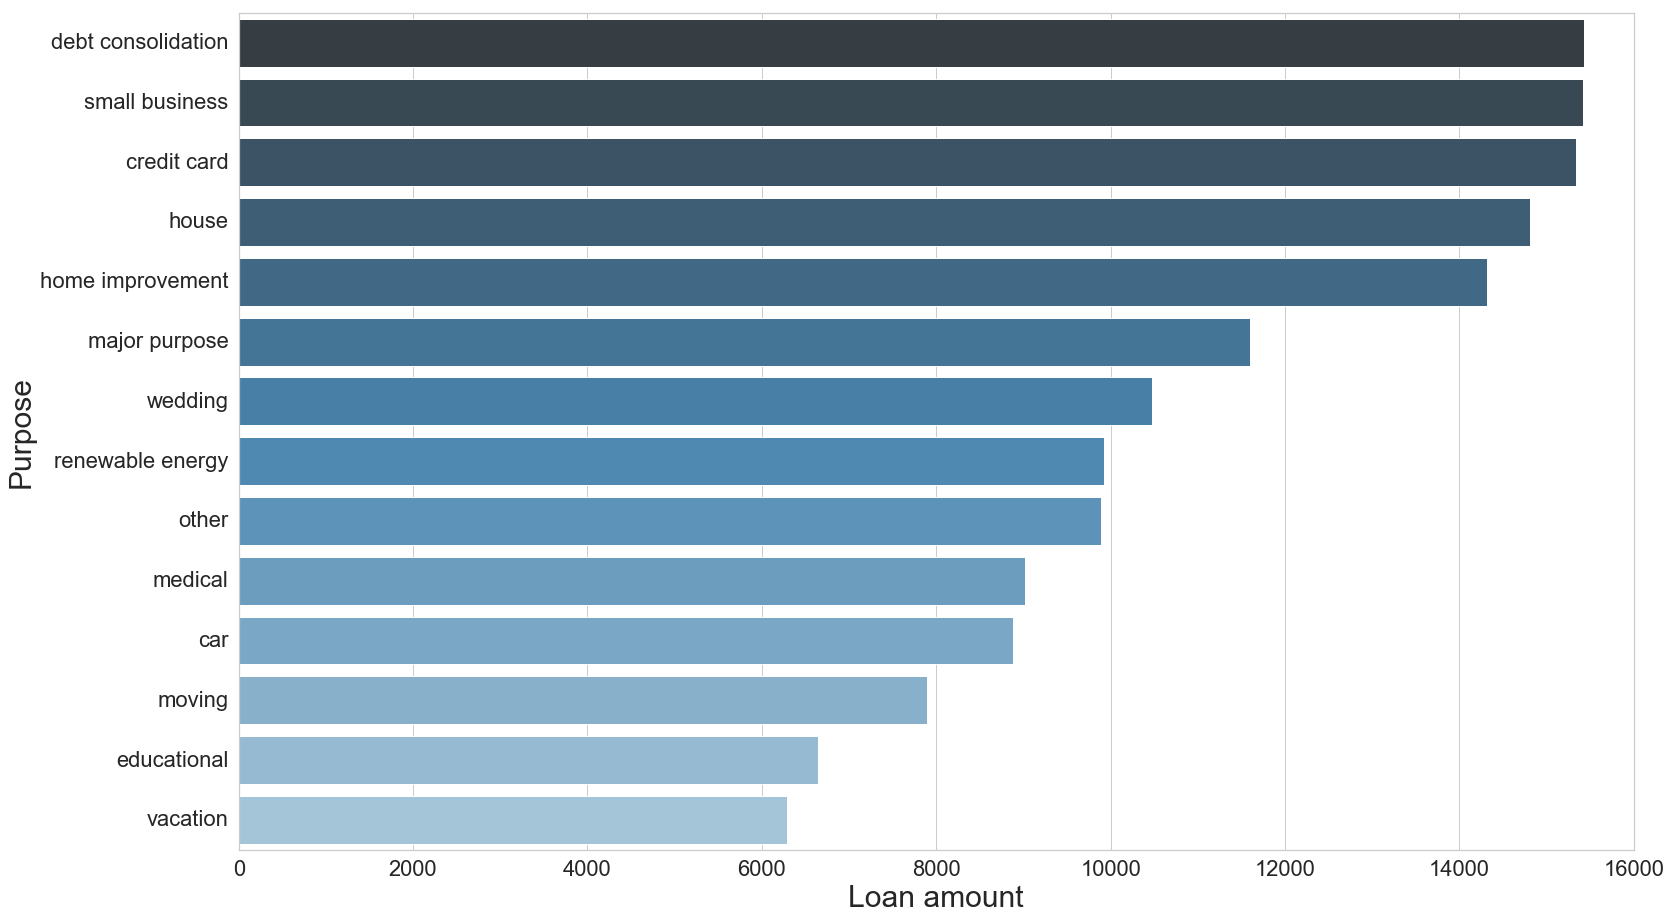

In [143]:
data77 = data77.rename(index={1: "credit card", 2: "car", 3: "small business", 4: "other", 5: "wedding", 
                              6: "debt consolidation", 7: "home improvement", 8: "major purpose", 9: "medical", 
                              10: "moving", 11: "vacation", 12: "house", 13:"renewable energy", 14:"educational"})
sns.set(style="whitegrid", font_scale=2)
plt.figure(figsize=(25,15))
g77 = sns.barplot(x="mean", y=data77.index, data=data77, palette="Blues_d",order=data77.sort_values('mean',ascending = False).index)
g77.set(xlim=(0, 16000))
g77.set_ylabel("Purpose",fontsize=30)
g77.set_xlabel("Loan amount",fontsize=30)
g77.figure.savefig('amo_pur_rel.png')

* The loan amount of debt consolidation is averaging the highest among all the categories.

In [44]:
data6.groupby('purpose_cat')['interest_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
purpose_cat,,,,,,,,
1,205996.0,11.771755,3.936872,5.32,8.380,11.53,14.160,28.99
2,8859.0,12.004765,4.236004,5.32,8.180,11.71,14.650,28.99
3,10361.0,16.236013,4.805185,5.32,12.990,16.29,19.200,28.99
4,42839.0,15.023260,4.525720,5.32,11.990,14.64,18.240,28.99
5,2346.0,14.152754,4.782861,5.42,10.380,13.99,17.930,25.99
6,523803.0,13.599965,4.319546,5.32,10.640,13.33,16.550,28.99
7,51788.0,13.026353,4.521904,5.32,9.170,12.69,15.800,28.99
8,17267.0,12.674613,4.498088,5.32,8.900,12.49,15.610,28.99
9,8533.0,14.563035,4.454620,5.32,11.530,14.09,17.570,28.99


* On average, the interest rate for credit card loan is smallest, while that for small business is the largest. Since the risk of commericial loan is higher than that of personal loan.

# Correlation 7 - employment length and loan amount

In [6]:
data7 = data0.iloc[:,[0, 1, 2, 3, 5, 6]]
display(data7.head())

,annual_inc,emp_length_int,interest_rate,loan_amount,loan_condition_cat,home_ownership_cat
0,24000,10.0,10.65,5000,0,1
1,30000,0.5,15.27,2500,1,1
2,12252,10.0,15.96,2400,0,1
3,49200,10.0,13.49,10000,0,1
4,80000,1.0,12.69,3000,0,1


ValueError: Could not interpret input 'mean'

In [8]:
data77 = data7.groupby('emp_length_int')['loan_amount'].describe()
display(data77)

,count,mean,std,min,25%,50%,75%,max
emp_length_int,,,,,,,,
0.50,70605.0,13798.109907,8290.187442,500.0,7500.0,12000.0,19100.0,35000.0
1.00,57095.0,13737.267274,8153.375539,500.0,7500.0,12000.0,18937.5,35000.0
2.00,78870.0,14015.692278,8205.983151,500.0,8000.0,12000.0,19425.0,35000.0
3.00,70026.0,14144.491332,8194.677475,500.0,8000.0,12000.0,19725.0,35000.0
4.00,52529.0,14263.240305,8231.250312,900.0,8000.0,12000.0,20000.0,35000.0
5.00,55704.0,14340.260125,8196.575684,1000.0,8000.0,12000.0,20000.0,35000.0
6.00,42950.0,14555.090803,8210.238586,1000.0,8000.0,12650.0,20000.0,35000.0
6.05,44825.0,11777.181818,7556.280306,1000.0,6000.0,10000.0,15925.0,35000.0
7.00,44594.0,14770.675988,8246.080094,500.0,8400.0,13200.0,20000.0,35000.0


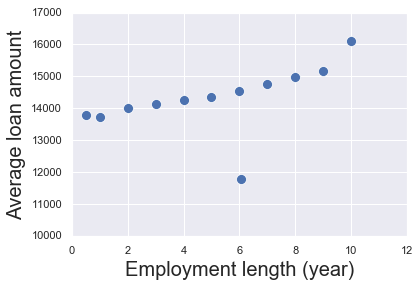

In [10]:
g77 = sns.scatterplot(x=data77.index, y="mean", data=data77,s=100)
g77.set_xlabel("Employment length (year)",fontsize=20)
g77.set_ylabel("Average loan amount",fontsize=20)
g77.set(ylim=(10000, 17000))
g77.figure.savefig('leng_amo_rel2.png')

In [8]:
data77 = data77.drop([6.05])

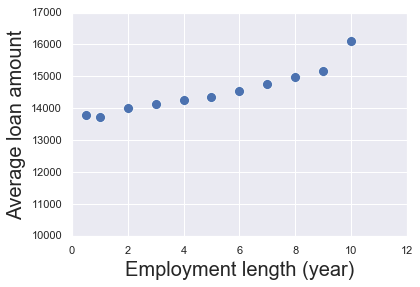

In [11]:
g88 = sns.scatterplot(x=data77.index, y="mean", data=data77,s=100)
g88.set_xlabel("Employment length (year)",fontsize=20)
g88.set_ylabel("Average loan amount",fontsize=20)
g88.set(ylim=(10000, 17000))
g88.figure.savefig('leng_amo_rel.png')